In [1]:
from google.colab import drive
drive.flush_and_unmount()

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!ls "/content/drive/MyDrive/Face Aging/models/AgeProgression-master/AgeProgression-master"

ageManifest.PNG   doc		   model.py		trained_models
aging_game.ipynb  encoder.png	   morf.PNG		utils.py
architecture.PNG  Generator.png    morphing_game.ipynb	VAEResults.PNG
consts.py	  im1.PNG	   __pycache__		venv
data		  im2.PNG	   README.md
disImg.PNG	  kids_game.ipynb  results
disZ.PNG	  main.py	   temp.py


In [4]:
path = "/content/drive/MyDrive/Face Aging/models/AgeProgression-master/AgeProgression-master"

In [5]:
import os
os.chdir(path)

In [6]:
os.listdir()

['model.py',
 'ageManifest.PNG',
 'consts.py',
 'utils.py',
 '.gitignore',
 'encoder.png',
 'im1.PNG',
 'temp.py',
 'main.py',
 'VAEResults.PNG',
 'disZ.PNG',
 'morphing_game.ipynb',
 'im2.PNG',
 'morf.PNG',
 'README.md',
 'disImg.PNG',
 'Generator.png',
 'architecture.PNG',
 '.ipynb_checkpoints',
 'trained_models',
 'doc',
 'venv',
 'results',
 '.idea',
 'data',
 'aging_game.ipynb',
 '__pycache__',
 'kids_game.ipynb']

In [7]:

import glob
import random
import shutil
from tempfile import gettempdir
from IPython.display import clear_output, Image
from torchvision.datasets.folder import pil_loader
from model import Net
from utils import pil_to_model_tensor_transform
import consts



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [8]:
consts.NUM_Z_CHANNELS = 100  # we have two trained models, with 50 and 100

In [9]:
os.listdir('./trained_models/100_Z_channels_200th_epoch')

['G.dat', 'E.dat']

In [10]:
net = Net()
# load_path = {50: r".\trained_models\2018_09_08\01_44\epoch76", 100: r"C:\Users\Mattan\Downloads\epoch_200_no_tf"}[consts.NUM_Z_CHANNELS]
load_path = './trained_models/100_Z_channels_200th_epoch'
load_path

'./trained_models/100_Z_channels_200th_epoch'

In [11]:
net.load(load_path, slim=True)  # slim tells the net to load only the encoder and generator

/usr/local/lib/python3.7/dist-packages/torch/serialization.py:656: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:656: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:656: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or

[14:29] Loaded E, G from ./trained_models/100_Z_channels_200th_epoch


In [12]:
# UTKFace constants

MALE = 0
FEMALE = 1

WHITE = 0
BLACK = 1
ASIAN = 2
INDIAN = 3
OTHER = 4

In [13]:
# User constants

dset_path = os.path.join('.', 'data', 'UTKFace', 'unlabeled')
tempdir = gettempdir()

In [14]:
len(os.listdir(dset_path))

23707

In [15]:
# Game 3: Kids
# Set the attributes of the first random person you want to test
age_1 = 30
gender_1 = FEMALE
race_1 = WHITE

In [16]:
image_path_1 = random.choice(glob.glob(os.path.join(dset_path, '{a}_{g}_{r}*'.format(a=age_1, g=gender_1, r=race_1))))
image_path_1

'./data/UTKFace/unlabeled/30_1_0_20170117170934860.jpg.chip.jpg'

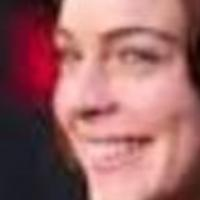

In [17]:
Image(filename=image_path_1)  # Will select and show a person with the attributes you selected

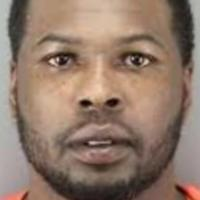

In [18]:
# Game 3: Kids
# Set the attributes of the second random person you want to test
age_2 = 35
gender_2 = MALE
race_2 = BLACK

image_path_2 = random.choice(glob.glob(os.path.join(dset_path, '{a}_{g}_{r}*'.format(a=age_2, g=gender_2, r=race_2))))
Image(filename=image_path_2)  # Will select and show a person with the attributes you selected

In [19]:
image_tensor_1 = pil_to_model_tensor_transform(pil_loader(image_path_1))
image_tensor_2 = pil_to_model_tensor_transform(pil_loader(image_path_2))

/tmp/kids.png
[14:29] Saved test result to /tmp/kids.png


/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)


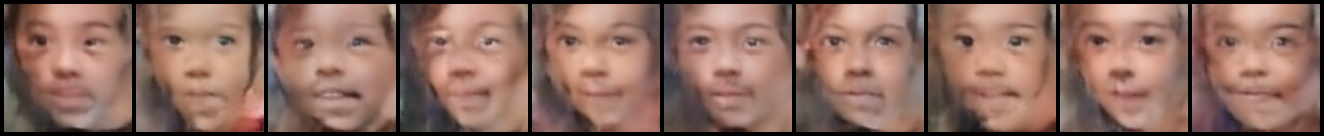

In [20]:
Image(filename=net.kids(image_tensors=(image_tensor_1, image_tensor_2), length=10, target=tempdir))